In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5332 - accuracy: 0.4424 - val_loss: 1.3117 - val_accuracy: 0.5254
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1796 - accuracy: 0.5801 - val_loss: 1.1339 - val_accuracy: 0.5931
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0364 - accuracy: 0.6362 - val_loss: 1.0488 - val_accuracy: 0.6282
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9410 - accuracy: 0.6697 - val_loss: 0.9476 - val_accuracy: 0.6632
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8606 - accuracy: 0.6974 - val_loss: 0.8975 - val_accuracy: 0.6861
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8021 - accuracy: 0.7200 - val_loss: 0.8836 - val_accuracy: 0.6914
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7533 - accuracy: 0.7359 - val_loss: 0.8735 -

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

313/313 - 4s - loss: 0.8388 - accuracy: 0.7142 - 4s/epoch - 11ms/step
Test accuracy: 0.71


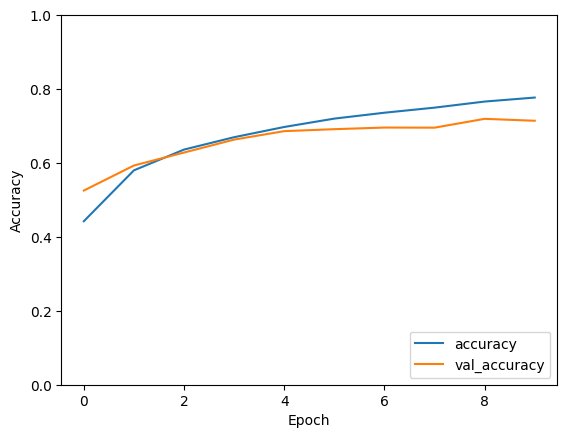

In [7]:
# Plot accuracy and loss over training epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()